In [31]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from pandas import datetime
warnings.filterwarnings('ignore')
# Load the dataset using pandas

In [32]:
def parser(x):
    return datetime.strptime(x,'%Y-%m-%d')

In [33]:
data = pd.read_csv('VOW3DE.csv',index_col=0, parse_dates=[0],date_parser=parser)


In [34]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1998-07-22,63.148163,65.053703,63.148163,64.596451,34.570709,56336
1998-07-23,65.308174,65.816116,61.750568,61.750568,33.047661,95571
1998-07-24,60.988155,62.258514,59.869881,61.496101,32.911476,154423
1998-07-27,61.496101,62.005039,59.463329,59.717796,31.959759,62875
1998-07-28,59.209850,61.445404,57.837109,58.294357,31.197968,116194


In [35]:
from statsmodels.graphics.tsaplots import plot_acf

In [36]:
data_diff = data.diff(periods=1)

<AxesSubplot:xlabel='Date'>

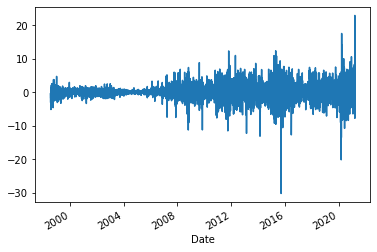

In [37]:
data_diff.Close.plot()

In [38]:
data_diff2 = data.diff(periods=2)

<AxesSubplot:xlabel='Date'>

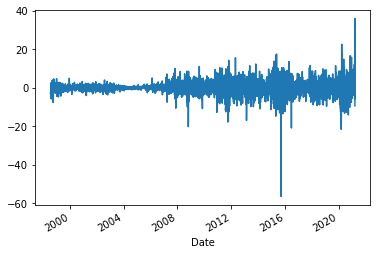

In [39]:
data_diff2.Close.plot()

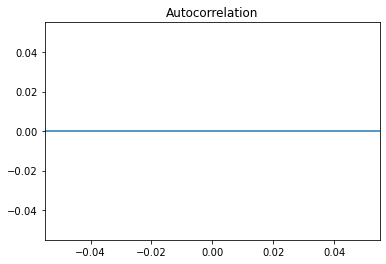

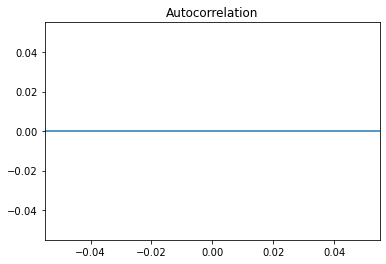

In [40]:
plot_acf(data_diff.Close)

In [41]:
X = data.Close.values
X.size

5803

In [42]:
train = X[0:5780] # 5000 data as train data
test = X[5780:]  # 803 data as test data
predictions = []

In [43]:
#Autoregressive Model (AR)

In [44]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()
warnings.filterwarnings('ignore')

In [45]:
predictions = model_ar_fit.predict(start=5760,end=5790)

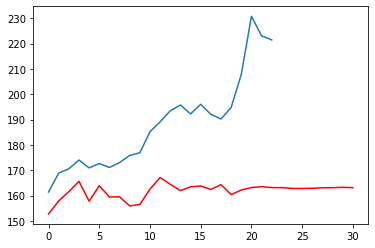

In [46]:
plt.plot(test)
plt.plot(predictions,color='red')

In [47]:
#ARIMA Model

In [48]:
from statsmodels.tsa.arima_model import ARIMA

In [49]:
model_arima = ARIMA(train,order=(4, 1, 3))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)
warnings.filterwarnings('ignore')

25721.515590581417


In [50]:
predictions= model_arima_fit.forecast(steps=30)[0]
predictions

array([163.07721233, 163.46027371, 163.44932283, 163.40822057,
       163.17853296, 163.31614044, 163.47349707, 163.57671152,
       163.40436036, 163.32188381, 163.40020861, 163.59700586,
       163.60801452, 163.48583916, 163.40766506, 163.52884606,
       163.67319573, 163.67302663, 163.54875107, 163.51703892,
       163.6349412 , 163.75744759, 163.72961449, 163.62697748,
       163.62042268, 163.74110018, 163.83313658, 163.79311849,
       163.70772257, 163.7260147 ])

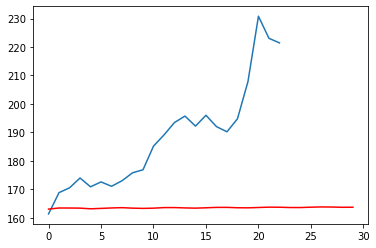

In [51]:
plt.plot(test)
plt.plot(predictions,color='red')

In [52]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [ ]:
import warnings
warnings.filterwarnings('ignore')
aicList = []
n = 0;

for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
         
        aicList.append

        aicList.insert(n,str(model_arima_fit.aic))
        
    except:
        continue

(0, 0, 0) 63513.29523058586
(0, 0, 1) 55741.5518325045
(0, 1, 0) 25782.496761670674
(0, 1, 1) 25734.30207688753
(0, 1, 2) 25734.568340666236
(0, 1, 3) 25734.100604858875
(0, 1, 4) 25732.85421921049
(0, 2, 0) 29230.615265704328
(0, 2, 1) 25789.51748278978
(0, 2, 2) 25741.1741803801
(0, 2, 3) 25741.478846467
(0, 2, 4) 25740.99140194209
(1, 0, 0) 25793.48820029196
(1, 0, 1) 25744.84376296813
(1, 0, 2) 25745.202430039524
(1, 0, 3) 25744.61184566532
(1, 0, 4) 25743.49527806772
(1, 1, 0) 25736.241464578397
(1, 1, 1) 25732.89409431141
(1, 2, 0) 27973.381729858043
(1, 2, 1) 25743.109000366763
(1, 2, 2) 25739.812696741166
(1, 2, 3) 25743.793154343253
(1, 2, 4) 25743.450674831467
(2, 0, 0) 25746.755120108126
(2, 0, 1) 25743.581991439994
(2, 1, 0) 25735.52874280972
(2, 1, 1) 25726.6371738234
(2, 1, 2) 25728.58327916241
(2, 2, 0) 27286.77884582177
(2, 2, 1) 25742.42875987575
(2, 2, 2) 25735.518312194192


In [ ]:
minAic = min(aicList)
print("The minimum AIC:",minAic)